In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
MaxAnglePerTrial = pd.read_csv(r'MaxAnglePerTrial.csv')
MedianVelocityPerTrial = pd.read_csv(r'MedianVelocityPerTrial.csv')
MinAngleRegionTwo = pd.read_csv(r'MinAngleRegionTwo.csv')
TimeDifferences = pd.read_csv(r'TimeDifferenceregionOneAndTwotoBasePlane.csv')
TotalDistances = pd.read_csv(r'TotalDistanceCovered.csv')

In [11]:
combinedAlgorithmData = pd.DataFrame()

In [38]:
combinedAlgorithmData['Trial'] = MaxAnglePerTrial.Trial
combinedAlgorithmData['BPM'] = MaxAnglePerTrial.BPM
combinedAlgorithmData['GestureSize'] = MaxAnglePerTrial.GestureSize

combinedAlgorithmData['MedianVelocityRegionOne'] = MedianVelocityPerTrial.MedianVelocityRegionOne
combinedAlgorithmData['MedianVelocityRegionTwo'] = MedianVelocityPerTrial.MedianVelocityRegionTwo

combinedAlgorithmData['RegionOneDistance'] = TotalDistances.TotalDistanceCoveredInRegionOne
combinedAlgorithmData['RegionTwoDistance'] = TotalDistances.TotalDistanceCoveredInRegionTwo
combinedAlgorithmData['TotalRegionDistance'] = TotalDistances.TotalDistanceCoveredBothRegions

combinedAlgorithmData['MaxAngleRegionOne'] = MaxAnglePerTrial.MaxAngleRegionOne
combinedAlgorithmData['MaxAngleRegionTwo'] = MaxAnglePerTrial.MaxAngleRegionTwo

combinedAlgorithmData['MinAngleRegionTwo'] = MinAngleRegionTwo.MinAngleRegionTwo

combinedAlgorithmData['TimeDiffRegionOneToPlane'] = TimeDifferences.TimeDiffRegionOneToPlane
combinedAlgorithmData['TimeDiffRegionTwoToPlane'] = TimeDifferences.TimeDiffRegionTwoToPlane
combinedAlgorithmData['TimeEndRegionOne'] = TimeDifferences.TimeEndRegionOne
combinedAlgorithmData['TimeEndRegionTwo'] = TimeDifferences.TimeEndRegionTwo
combinedAlgorithmData['TimeStartRegionOne'] = TimeDifferences.TimeStartRegionOne
combinedAlgorithmData['TimeStartRegionTwo'] = TimeDifferences.TimeStartRegionTwo
combinedAlgorithmData['TimeDifferenceBetweenCollisions'] = TimeDifferences.TimeDifferenceBetweenCollisions

In [39]:
X = combinedAlgorithmD

,Trial,BPM,GestureSize,MedianVelocityRegionOne,MedianVelocityRegionTwo,RegionOneDistance,RegionTwoDistance,TotalRegionDistance,MaxAngleRegionOne,MaxAngleRegionTwo,MinAngleRegionTwo,TimeDiffRegionOneToPlane,TimeDiffRegionTwoToPlane,TimeEndRegionOne,TimeEndRegionTwo,TimeStartRegionOne,TimeStartRegionTwo,TimeDifferenceBetweenCollisions
0,1.0,80.0,S,1.080500,0.607110,0.330200,0.137140,0.467340,67.87199,69.45491,67.03144,0.30,0.16,0.46,0.60,0.12,0.48,0.64
1,2.0,80.0,S,0.959128,0.566222,0.314733,0.127905,0.442638,69.85532,70.92043,66.94464,0.32,0.16,0.46,0.62,0.12,0.48,0.66
2,3.0,80.0,S,1.077521,0.653276,0.372317,0.160993,0.533310,68.08369,67.91116,61.58102,0.36,0.16,0.52,0.72,0.16,0.54,0.72
3,4.0,80.0,S,1.140583,0.509770,0.322106,0.153529,0.475635,75.15100,77.19430,75.72021,0.28,0.12,0.56,0.72,0.24,0.58,0.60
4,5.0,80.0,S,1.131928,0.530763,0.353290,0.159236,0.512527,71.39948,71.43022,65.42288,0.33,0.17,0.58,0.74,0.24,0.60,0.67
5,6.0,80.0,S,1.054572,0.646852,0.378480,0.151298,0.529778,68.97768,68.98109,63.35981,0.31,0.17,0.54,0.68,0.16,0.56,0.69
6,7.0,80.0,S,1.065533,0.686721,0.364391,0.153618,0.518008,71.99378,72.95826,69.66460,0.37,0.15,0.48,0.70,0.18,0.54,0.67
7,8.0,80.0,S,1.142082,0.684393,0.356927,0.157560,0.514487,69.70382,70.11354,64.22867,0.35,0.13,0.44,0.66,0.16,0.50,0.63
8,9.0,80.0,S,1.281573,0.726306,0.403837,0.194761,0.598598,71.18315,71.30025,65.47829,0.43,0.19,0.54,0.78,0.26,0.56,0.71
9,10.0,80.0,S,1.253284,0.606073,0.421463,0.188749,0.610212,70.62938,71.39008,66.58222,0.35,0.17,0.54,0.72,0.20,0.56,0.69


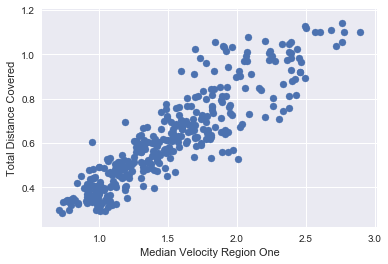

In [34]:
plt.xlabel('Median Velocity Region One');
plt.ylabel('Total Distance Covered')
plt.scatter(combinedAlgorithmData.MedianVelocityRegionOne,combinedAlgorithmData.TotalRegionDistance)

In [41]:
combinedAlgorithmData.to_csv(r'CombinedAlgorithmData.csv')